# Retrieval metrics with different embeddings, before keypoints

- "Flag face landmarks"
- "Position face landmarks"
- "Positions norm face landmarks"
- "Flags + positions unnorm"
- "Flags + positions norm"
- "All features face landmarks"

**Load the dataset**

In [ ]:
from matplotlib.lines import lineStyles
%load_ext autoreload
%autoreload 2

from libraries.embeddings_utils import *
from libraries.classifier_utils import *
from libraries.retrieval_utils import *
from libraries.file_manager_utils import *

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"

In [ ]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load")

In [ ]:
print(f"Dataset contains {emb_builder.dim_dataset} elements.\nIn particular {emb_builder.dim_dataset-emb_builder.y.sum()} {'baby_safe' if emb_builder.classes_bs['baby_safe'] == 0 else 'baby_unsafe'} and {emb_builder.y.sum()} {'baby_safe' if emb_builder.classes_bs['baby_safe'] == 1 else 'baby_unsafe'}")

**Create embeddings**

In [15]:
e_flags = emb_builder.create_embedding(flags = True)
e_positions = emb_builder.create_embedding(flags = True, positions=True)
e_positions_norm = emb_builder.create_embedding(flags = True, positions_normalized=True)
e_all_unnorm = emb_builder.create_embedding(flags = True, positions=True, geometric_info=True)
e_all_norm = emb_builder.create_embedding(flags = True, positions_normalized = True, geometric_info=True)
e_all = emb_builder.create_embedding(flags = True, positions = True, positions_normalized=True, geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------

Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------

Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm']
FINISHED: 4158 embedding created
-----------------------------------------------

**Initialize retrieval objects**

In [16]:
embeddings = [e_flags, e_positions, e_positions_norm, e_all_unnorm, e_all_norm, e_all]
embeddings_names = ["Flag face landmarks", "Position face landmarks", "Positions norm face landmarks", "Flags + positions unnorm", "Flags + positions norm", "All features face landmarks"]

retrieval_euclidean = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}
retrieval_cosine = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}
retrieval_mahalanobis = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}

In [17]:
for name, retrieval in retrieval_euclidean.items():
    retrieval.build_index(metric="euclidean")

for name, retrieval in retrieval_cosine.items():
    retrieval.build_index(metric="cosine")

for name, retrieval in retrieval_mahalanobis.items():
    retrieval.build_mahalanobis_index()

**Evaluate precison, recall@R and silhouette scores**

In [18]:
k_values = [5, 10, 20, 50]
precision_scores_euclidean = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")

precision_scores_cosine = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")

precision_scores_mahalanobis = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Precision scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Precision scores evaluated successfully!


In [19]:
recall_scores_euclidean = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")

recall_scores_cosine = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")

recall_scores_mahalanobis = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Recall@R scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Recall@R scores evaluated successfully!


In [20]:
silhouette_scores_euclidean = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")

silhouette_scores_cosine = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")

silhouette_scores_mahalanobis = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Silhouette scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Silhouette scores evaluated successfully!


**Compare embeddings according to precision, recall, silhouette scores and UMAP distriution**

Precision scores

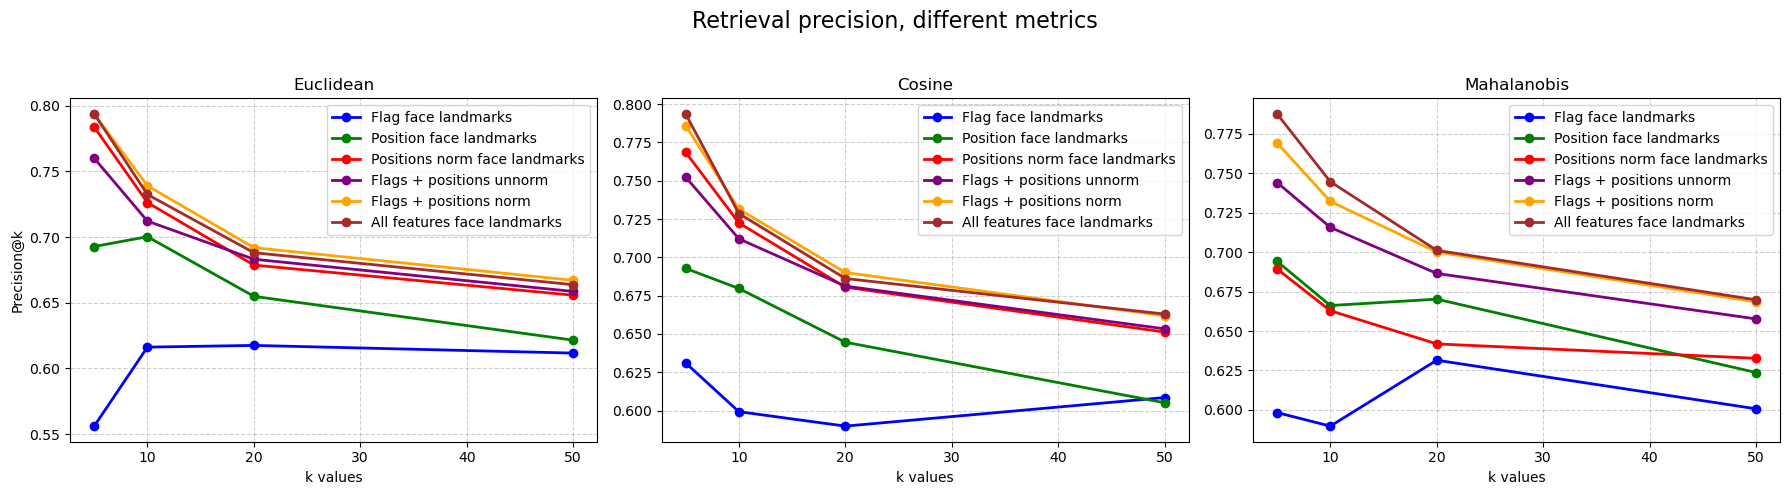

In [21]:
import matplotlib.pyplot as plt
figsize = (18, 5)

fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [precision_scores_euclidean, precision_scores_cosine, precision_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    for score, label, color in zip(scores.values(), scores.keys(), colors):
        ax.plot(k_values, score, marker="o", color=color, linewidth=2, label=label)
    ax.set_title(metric)
    ax.set_xlabel("k values")
    ax.grid(True, linestyle="--", alpha=0.6)
    if ax == axes[0]:
        ax.set_ylabel("Precision@k")
    ax.legend()

plt.suptitle("Retrieval precision, different metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Recall@R scores

/tmp/ipykernel_19559/21631909.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/21631909.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/21631909.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")


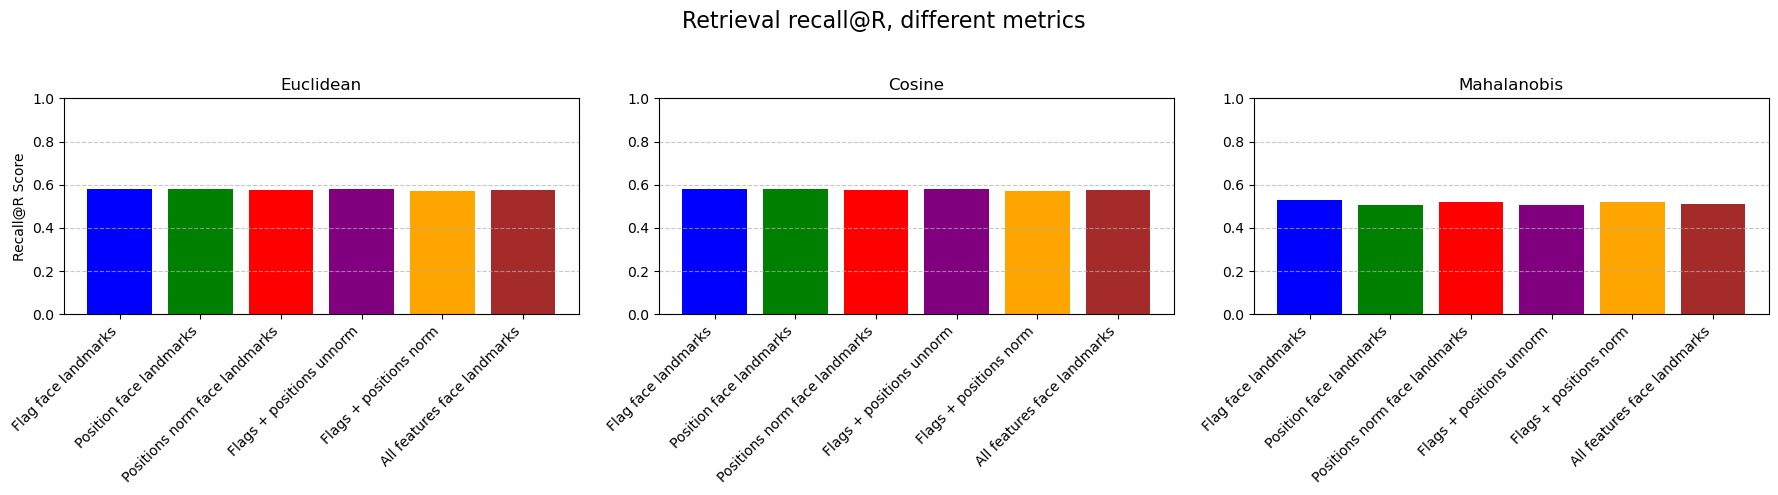

In [22]:
figsize = (18, 5)
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [recall_scores_euclidean, recall_scores_cosine, recall_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(metric)
    ax.set_ylabel("Recall@R Score" if ax == axes[0] else "")
    ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Retrieval recall@R, different metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Silhouette scores

/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")


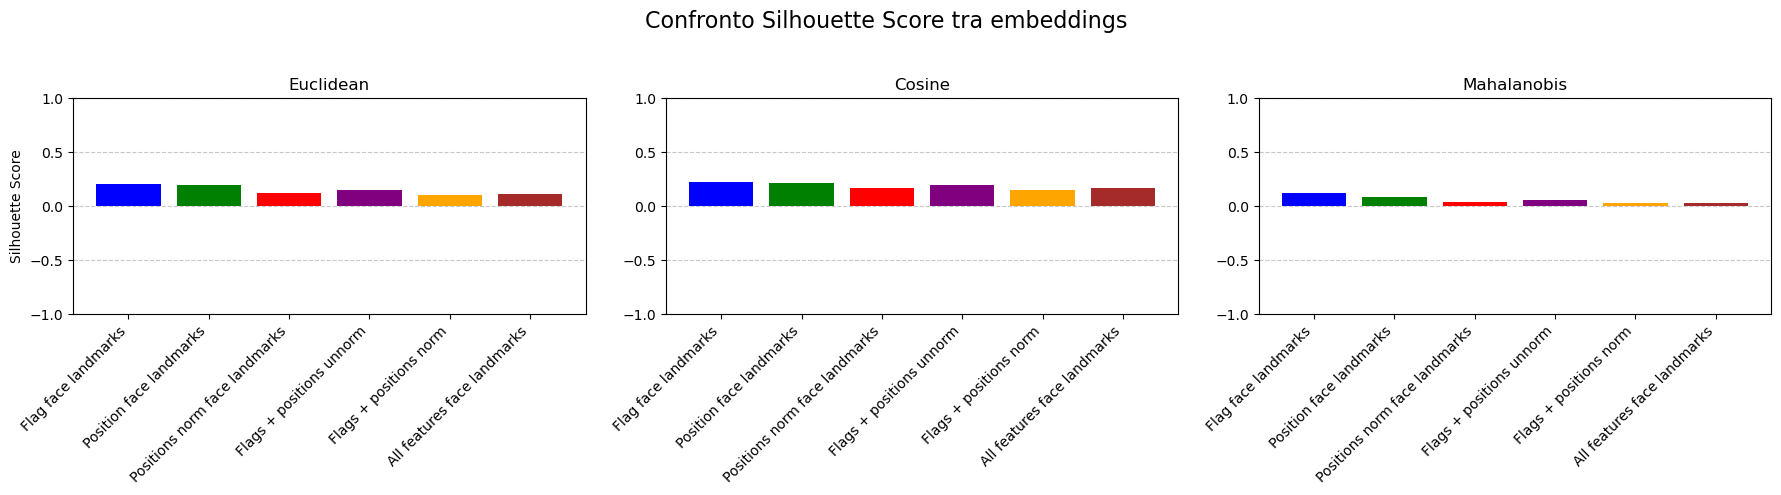

In [23]:
figsize = (18, 5)
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [silhouette_scores_euclidean, silhouette_scores_cosine, silhouette_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(metric)
    ax.set_ylabel("Silhouette Score" if ax == axes[0] else "")
    ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
    ax.set_ylim(-1, 1)  # Silhouette score range
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Confronto Silhouette Score tra embeddings", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Recap with all scores

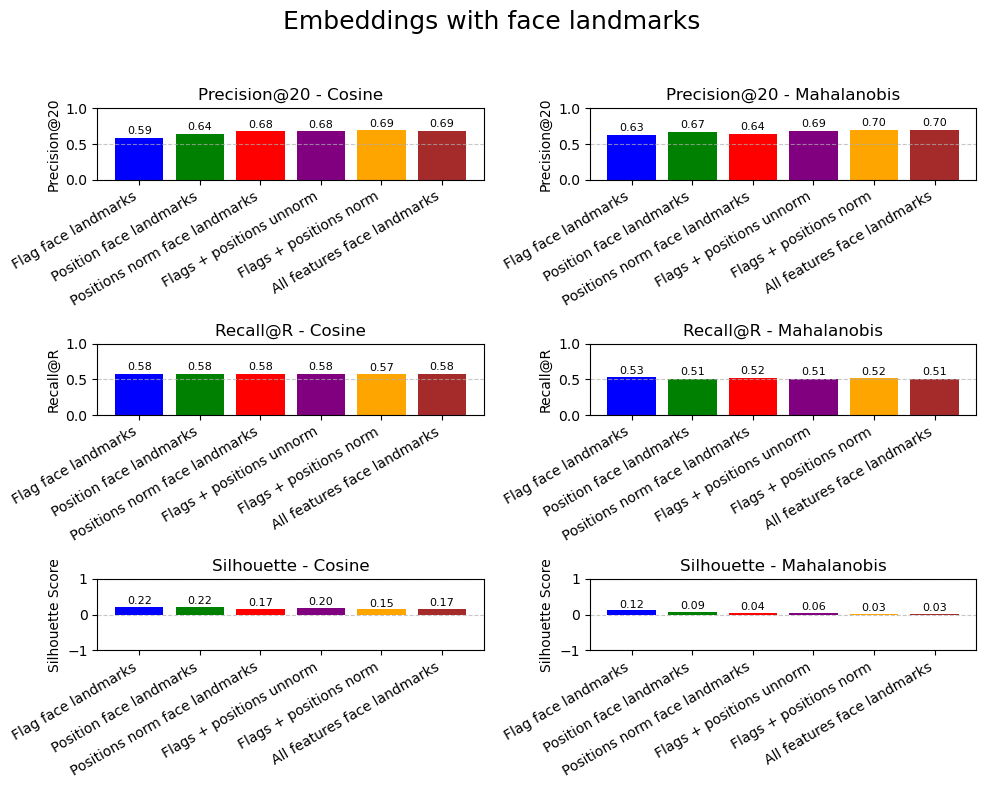

In [24]:
figsize = (10,8)
fig, axes = plt.subplots(3, 2, figsize=figsize, sharey=False)

colors = ["blue", "green", "red", "purple", "orange", "brown"]

# --- Prima riga: Precision@20 ---
metrics_prec = ["Cosine", "Mahalanobis"]
scores_prec = [
    [val[2] for val in precision_scores_cosine.values()],
    [val[2] for val in precision_scores_mahalanobis.values()]
]
embeddings_labels = list(precision_scores_cosine.keys())

for ax, metric, scores in zip(axes[0, :2], metrics_prec, scores_prec):
    bars = ax.bar(embeddings_labels, scores, color=colors[:len(embeddings_labels)])
    ax.set_title(f"Precision@20 - {metric}")
    ax.set_ylabel("Precision@20")
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(embeddings_labels)))
    ax.set_xticklabels(embeddings_labels, rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

# --- Seconda riga: Recall@R ---
metrics_rec = ["Cosine", "Mahalanobis"]
scores_rec = [recall_scores_cosine, recall_scores_mahalanobis]

for ax, metric, scores in zip(axes[1, :2], metrics_rec, scores_rec):
    bars = ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(f"Recall@R - {metric}")
    ax.set_ylabel("Recall@R")
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(), rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

# --- Terza riga: Silhouette ---
metrics_sil = ["Cosine", "Mahalanobis"]
scores_sil = [ silhouette_scores_cosine, silhouette_scores_mahalanobis]

# Come hai 3 metriche ma solo 2 colonne, puoi fare solo le prime due colonne o cambiare a 3x2
for ax, metric, scores in zip(axes[2, :], metrics_sil[:2], scores_sil[:2]):
    bars = ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(f"Silhouette - {metric}")
    ax.set_ylabel("Silhouette Score")
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(), rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

plt.suptitle("Embeddings with face landmarks", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


UMAP embeddings distribution

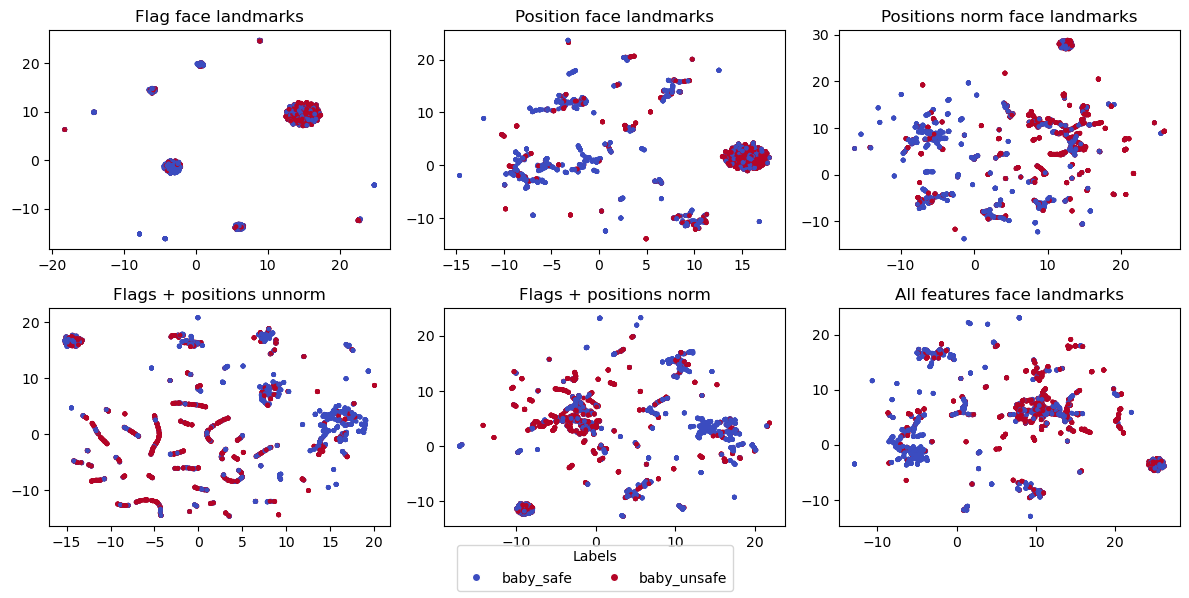

In [25]:
import matplotlib.pyplot as plt
import umap
from matplotlib.lines import Line2D
import math

retrieval_items = list(retrieval_cosine.items())
n = len(retrieval_items)
cols = 3  # massimo 3 grafici per riga
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharey=False)
axes = axes.reshape(rows, cols) if n > 1 else [[axes]]

# Creo la legenda una sola volta (dal primo embedding)
cmap = plt.colormaps["coolwarm"].resampled(2)
first_ret = retrieval_items[0][1]
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(idx),
           markersize=6, label=lbl)
    for lbl, idx in first_ret.classes_bs.items()
]

for i, (name, ret) in enumerate(retrieval_items):
    r = i // cols
    c = i % cols
    ax = axes[r, c]

    # UMAP projection
    reducer = umap.UMAP(n_components=2, random_state=42)
    proj = reducer.fit_transform(ret.embeddings_norm)

    # Scatter sul subplot
    ax.scatter(proj[:, 0], proj[:, 1], c=ret.labels, s=6, cmap=cmap)
    ax.set_title(name)

for j in range(n, rows*cols):
    r = j // cols
    c = j % cols
    fig.delaxes(axes[r, c])

fig.legend(handles=legend_elements, title="Labels", loc="lower center", ncol=len(legend_elements))
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


**Compare embeddings according to visual image similarity**

/home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3/8183A0BE-C370-4CDD-8252-6B699E31D570_JPG_jpg.rf.955e09e07223486cb7f30911544ba793.jpg
Image to retrieve


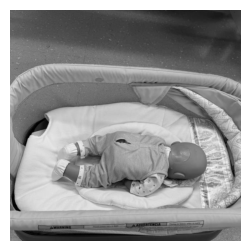

Flag face landmarks---------------------------------------------------------------------------------


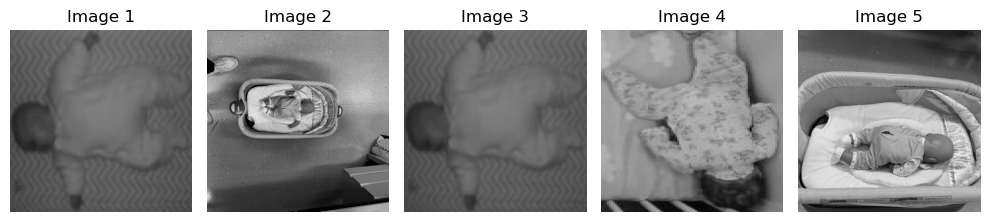

Position face landmarks-----------------------------------------------------------------------------


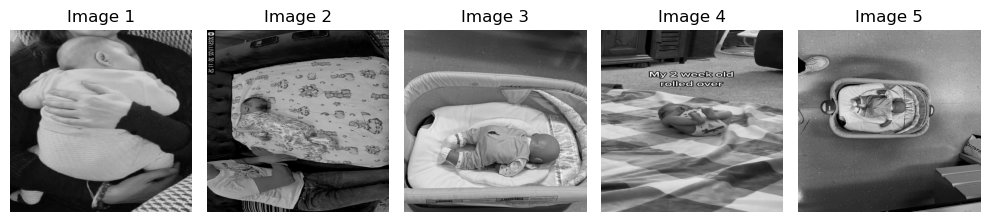

Positions norm face landmarks-----------------------------------------------------------------------


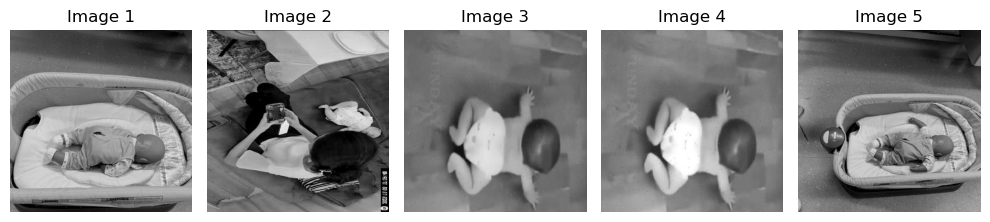

Flags + positions unnorm----------------------------------------------------------------------------


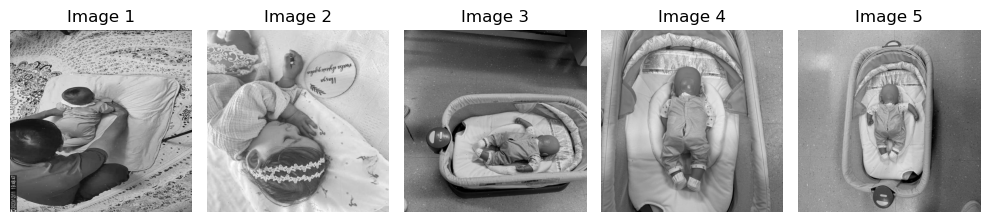

Flags + positions norm------------------------------------------------------------------------------


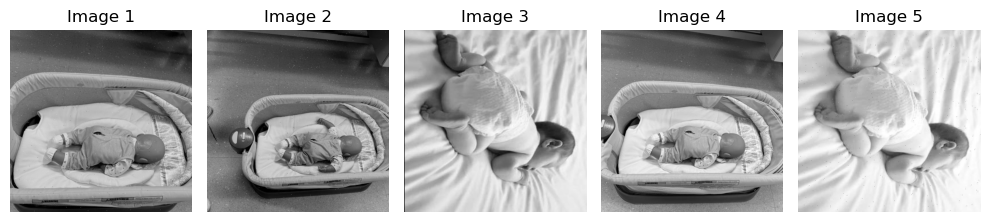

All features face landmarks-------------------------------------------------------------------------


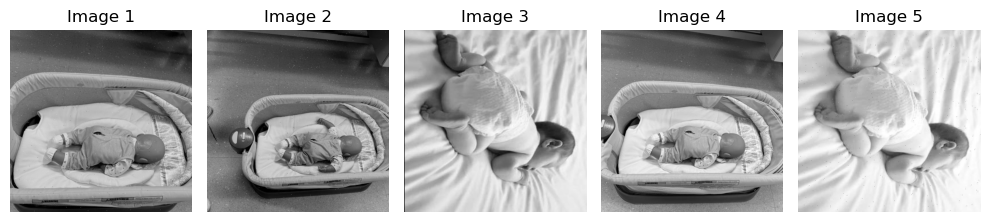

In [26]:
image_paths = emb_builder.image_paths
idx_query = 98
image_to_retrieve = f"{image_dataset_path}/{image_paths[idx_query]}"
print(image_to_retrieve)
print("Image to retrieve")
img = mpimg.imread(image_to_retrieve)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

for name, retrieval in retrieval_euclidean.items():
    print(f"{name}".ljust(100, "-"))
    distances_all, image_paths_similar_all = retrieval.retrieve_similar(idx_query=idx_query,k=5,verbose=False)
    retrieval.show_images(image_paths_similar_all)

**Classifier training with different embeddings**

In [27]:
embeddings_classifiers = {name : Classifier(emb, emb_builder.y, emb_builder.classes_bs) for name, emb in zip(embeddings_names, embeddings)}

In [28]:
clf = XGBClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1,
            reg_alpha=0.5,
            random_state=None
        )

learning_scores = { name: classifier.plot_learning_curve(clf, verbose = False) for name, classifier in embeddings_classifiers.items()}
print("Learning scores evaluated successfully!")

/home/terra/anaconda3/envs/SIDS_project/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/terra/anaconda3/envs/SIDS_project/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'many

Learning scores evaluated successfully!


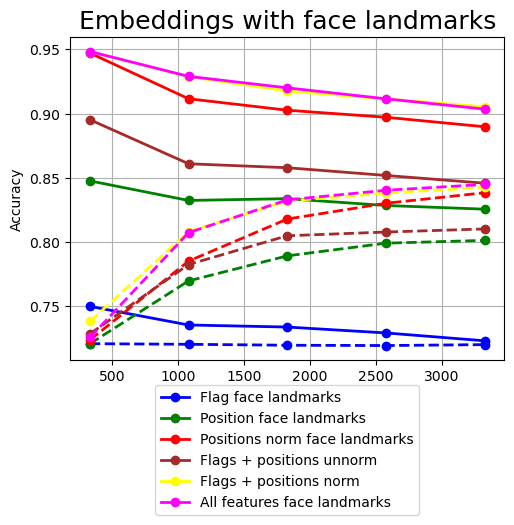

In [37]:
figsize = (embeddings_classifiers["Flag face landmarks"].figsize[0], embeddings_classifiers["Flag face landmarks"].figsize[1])
colors = ["blue", "green", "red", "brown", "yellow", "fuchsia"]

plt.figure(figsize=figsize)
for score, label, color in zip(learning_scores.values(), learning_scores.keys(), colors):
    plt.plot(score[0], score[3], marker="o", color=color, linewidth=2, label=label)
    plt.plot(score[0], score[4], marker="o", color=color, linewidth=2,linestyle="--")
    #plt.plot(score[0][len(score[0])-1], score[4][len(score[4])-1], marker="x",markersize = 10, color=color)

# Legenda
plt.legend(
    loc="lower center",          # posizione di riferimento
    bbox_to_anchor=(0.5, -0.5),    # sposta la legenda a destra del grafico
    fontsize=10
)
plt.ylabel("Accuracy")
plt.title("Embeddings with face landmarks", fontsize=18)
plt.grid(True)
plt.show()

# Retrieval metrics with different embeddings, with keypoints

- "All features face + pose positions"
- "All features face + pose geometrics"
- "All features face + all features pose"

**Load the dataset**

In [32]:
%load_ext autoreload
%autoreload 2

from libraries.embeddings_utils import *
import ipynbname
from libraries.classifier_utils import *
from libraries.retrieval_utils import *
from libraries.file_manager_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe=f"{project_dir}/models/2.pe_weights/best.pt"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load", model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


**Create embeddings**

In [34]:
e_all_positions =emb_builder.create_embedding(flags = True, positions = True,positions_normalized=True, geometric_info=True, k_positions_normalized=True)

e_all_geometric = emb_builder.create_embedding(flags = True, positions = True,positions_normalized=True, geometric_info=True, k_geometric_info=True)

e_all_all = emb_builder.create_embedding(flags = True, positions = True,positions_normalized=True, geometric_info=True, k_positions_normalized=True, k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

**Initialize retrieval objects**

In [38]:
embeddings = [e_all_positions, e_all_geometric, e_all_all]
embeddings_names = ["All features face + pose positions",  "All features face + pose geometrics", "All features face + all features pose"]

retrieval_euclidean = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}
retrieval_cosine = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}
retrieval_mahalanobis = { name: ImageRetrieval(emb, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
                        for name, emb  in zip(embeddings_names, embeddings)}

In [39]:
for name, retrieval in retrieval_euclidean.items():
    retrieval.build_index(metric="euclidean")

for name, retrieval in retrieval_cosine.items():
    retrieval.build_index(metric="cosine")

for name, retrieval in retrieval_mahalanobis.items():
    retrieval.build_mahalanobis_index()

**Evaluate precison, recall@R and silhouette scores**

In [40]:
k_values = [5, 10, 20, 50]
precision_scores_euclidean = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")
precision_scores_cosine = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")
precision_scores_mahalanobis = {name: retrieval.plot_precision_at_k(k_values=k_values, verbose=False)
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Precision scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Precision scores evaluated successfully!


In [41]:
recall_scores_euclidean = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")
recall_scores_cosine = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")
recall_scores_mahalanobis = {name: retrieval.recall_at_R()
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Recall@R scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Recall@R scores evaluated successfully!


In [42]:
silhouette_scores_euclidean = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_euclidean.items()}
print("Processed n' 1")
silhouette_scores_cosine = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_cosine.items()}
print("Processed n' 2")
silhouette_scores_mahalanobis = {name: retrieval.plot_silhouette_per_class()
                              for name, retrieval in retrieval_mahalanobis.items()}
print("Processed n' 3")
print("Silhouette scores evaluated successfully!")

Processed n' 1
Processed n' 2
Processed n' 3
Silhouette scores evaluated successfully!


**Compare embeddings according to precision, recall, silhouette scores and UMAP distribution**

Precision scores

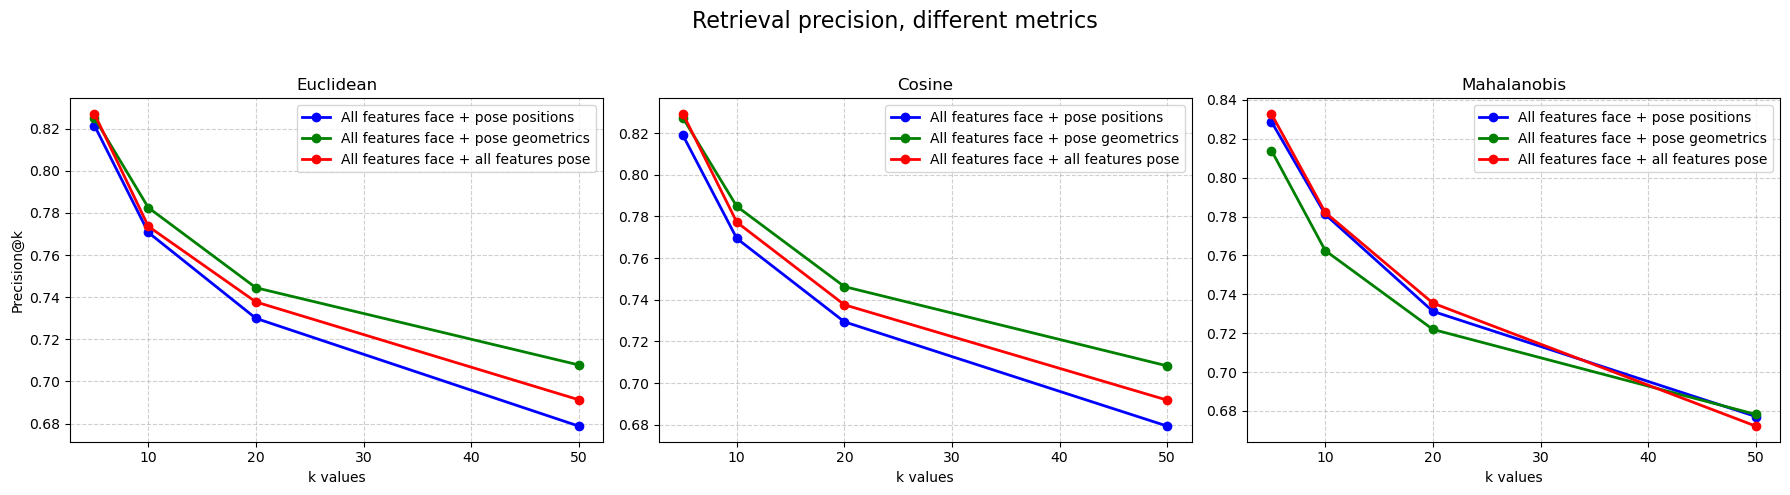

In [43]:
import matplotlib.pyplot as plt
figsize = (18, 5)

fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [precision_scores_euclidean, precision_scores_cosine, precision_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    for score, label, color in zip(scores.values(), scores.keys(), colors):
        ax.plot(k_values, score, marker="o", color=color, linewidth=2, label=label)
    ax.set_title(metric)
    ax.set_xlabel("k values")
    ax.grid(True, linestyle="--", alpha=0.6)
    if ax == axes[0]:
        ax.set_ylabel("Precision@k")
    ax.legend()

plt.suptitle("Retrieval precision, different metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Recall@R scores

/tmp/ipykernel_19559/153923360.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/153923360.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/153923360.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")


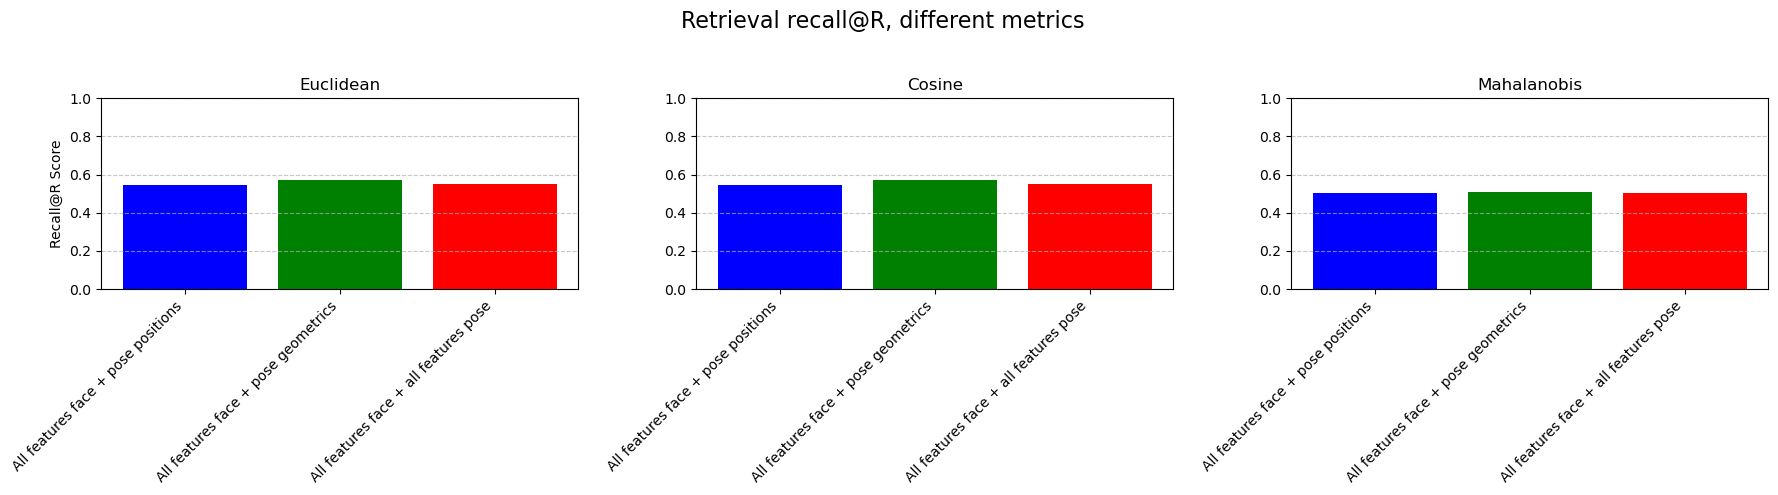

In [44]:
figsize = (18, 5)
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [recall_scores_euclidean, recall_scores_cosine, recall_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(metric)
    ax.set_ylabel("Recall@R Score" if ax == axes[0] else "")
    ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Retrieval recall@R, different metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Silhouette scores

/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
/tmp/ipykernel_19559/1504056166.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.keys(), rotation=45, ha="right")


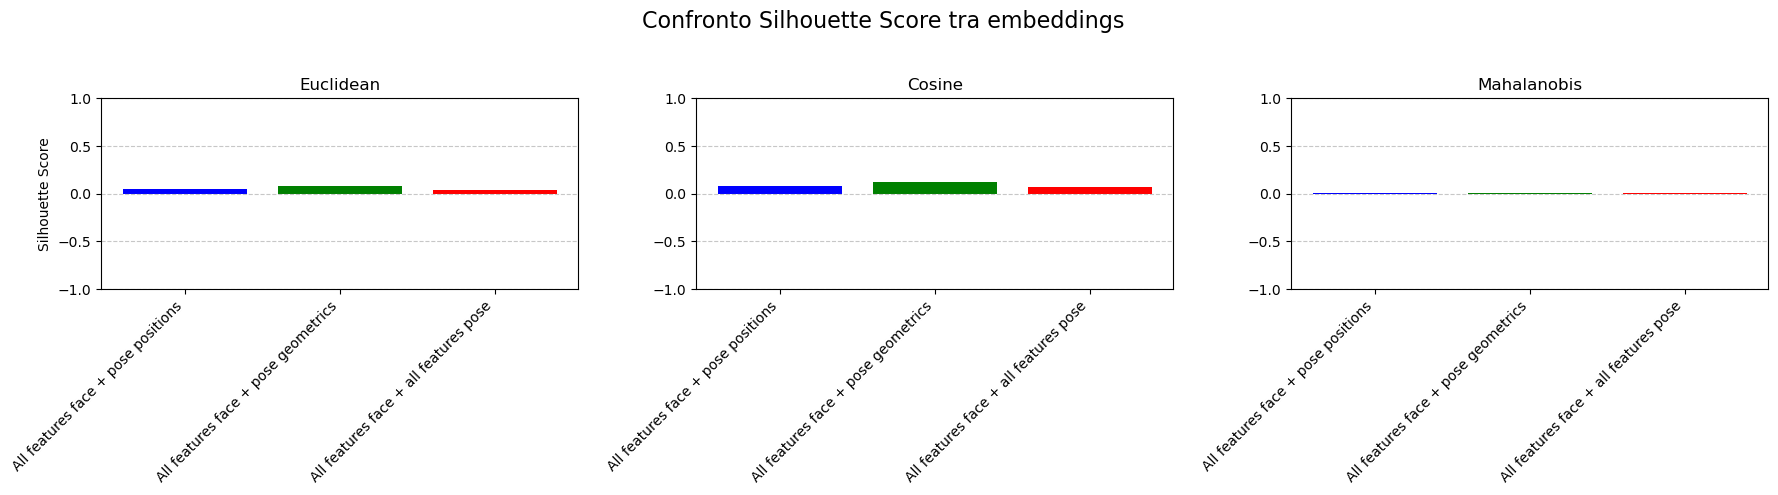

In [45]:
figsize = (18, 5)
fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=False)

metrics = ["Euclidean", "Cosine", "Mahalanobis"]
all_scores = [silhouette_scores_euclidean, silhouette_scores_cosine, silhouette_scores_mahalanobis]
colors = ["blue", "green", "red", "purple", "orange", "brown"]

for ax, metric, scores in zip(axes, metrics, all_scores):
    ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(metric)
    ax.set_ylabel("Silhouette Score" if ax == axes[0] else "")
    ax.set_xticklabels(scores.keys(), rotation=45, ha="right")
    ax.set_ylim(-1, 1)  # Silhouette score range
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Confronto Silhouette Score tra embeddings", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Recap with all scores

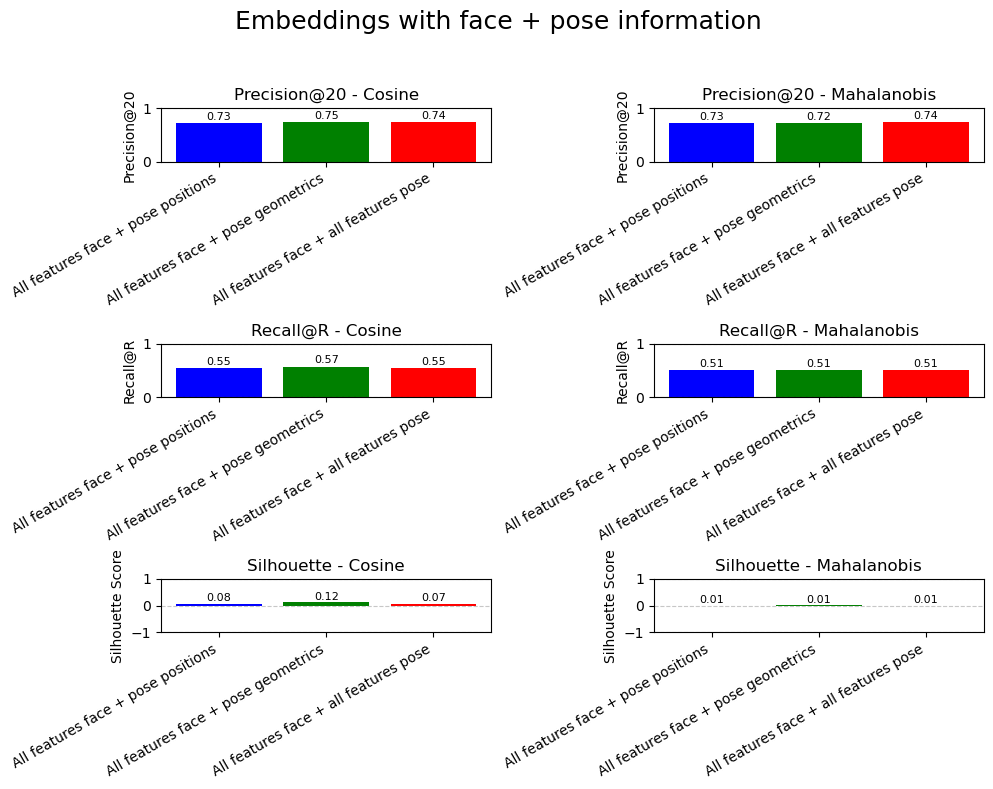

In [46]:
import matplotlib.pyplot as plt

figsize = (10,8)
fig, axes = plt.subplots(3, 2, figsize=figsize, sharey=False)

colors = ["blue", "green", "red", "purple", "orange", "brown"]

# --- Prima riga: Precision@20 ---
metrics_prec = ["Cosine", "Mahalanobis"]
scores_prec = [
    [val[2] for val in precision_scores_cosine.values()],
    [val[2] for val in precision_scores_mahalanobis.values()]
]
embeddings_labels = list(precision_scores_cosine.keys())

for ax, metric, scores in zip(axes[0, :2], metrics_prec, scores_prec):
    bars = ax.bar(embeddings_labels, scores, color=colors[:len(embeddings_labels)])
    ax.set_title(f"Precision@20 - {metric}")
    ax.set_ylabel("Precision@20")
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(embeddings_labels)))
    ax.set_xticklabels(embeddings_labels, rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

# --- Seconda riga: Recall@R ---
metrics_rec = ["Cosine", "Mahalanobis"]
scores_rec = [recall_scores_cosine, recall_scores_mahalanobis]

for ax, metric, scores in zip(axes[1, :2], metrics_rec, scores_rec):
    bars = ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(f"Recall@R - {metric}")
    ax.set_ylabel("Recall@R")
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(), rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

# --- Terza riga: Silhouette ---
metrics_sil = ["Cosine", "Mahalanobis"]
scores_sil = [ silhouette_scores_cosine, silhouette_scores_mahalanobis]

# Come hai 3 metriche ma solo 2 colonne, puoi fare solo le prime due colonne o cambiare a 3x2
for ax, metric, scores in zip(axes[2, :], metrics_sil[:2], scores_sil[:2]):
    bars = ax.bar(scores.keys(), scores.values(), color=colors[:len(scores)])
    ax.set_title(f"Silhouette - {metric}")
    ax.set_ylabel("Silhouette Score")
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(), rotation=30, ha="right")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # etichette sopra le barre
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., h + 0.02,
                f"{h:.2f}", ha='center', va='bottom', fontsize=8)

plt.suptitle("Embeddings with face + pose information", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


UMAP distribution

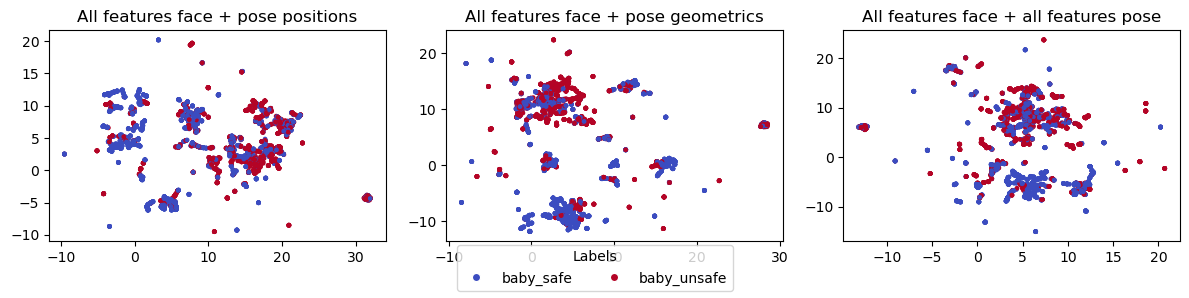

In [47]:
import matplotlib.pyplot as plt
import umap
from matplotlib.lines import Line2D
import math

retrieval_items = list(retrieval_cosine.items())
n = len(retrieval_items)
cols = 3  # massimo 3 grafici per riga
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharey=False)
axes = axes.reshape(rows, cols) if n > 1 else [[axes]]

# Creo la legenda una sola volta (dal primo embedding)
cmap = plt.colormaps["coolwarm"].resampled(2)
first_ret = retrieval_items[0][1]
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(idx),
           markersize=6, label=lbl)
    for lbl, idx in first_ret.classes_bs.items()
]

for i, (name, ret) in enumerate(retrieval_items):
    r = i // cols
    c = i % cols
    ax = axes[r, c]

    # UMAP projection
    reducer = umap.UMAP(n_components=2, random_state=42)
    proj = reducer.fit_transform(ret.embeddings_norm)

    # Scatter sul subplot
    ax.scatter(proj[:, 0], proj[:, 1], c=ret.labels, s=6, cmap=cmap)
    ax.set_title(name)

for j in range(n, rows*cols):
    r = j // cols
    c = j % cols
    fig.delaxes(axes[r, c])

fig.legend(handles=legend_elements, title="Labels", loc="lower center", ncol=len(legend_elements))
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


**Compare embeddings according to visual image similarity**

Image to retrieve


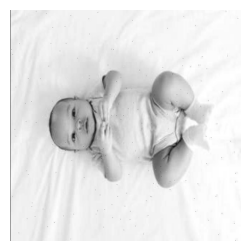

All features face + pose positions------------------------------------------------------------------


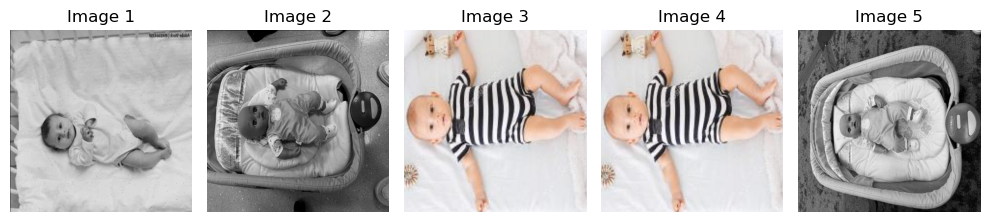

All features face + pose geometrics-----------------------------------------------------------------


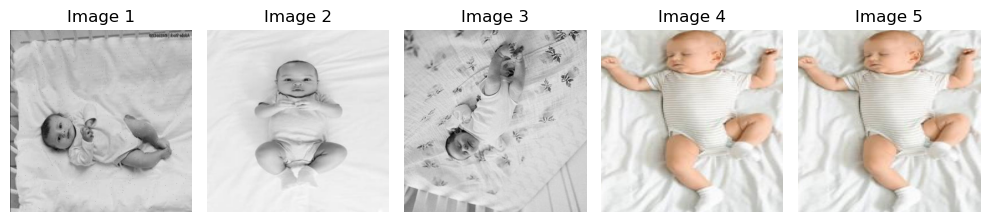

All features face + all features pose---------------------------------------------------------------


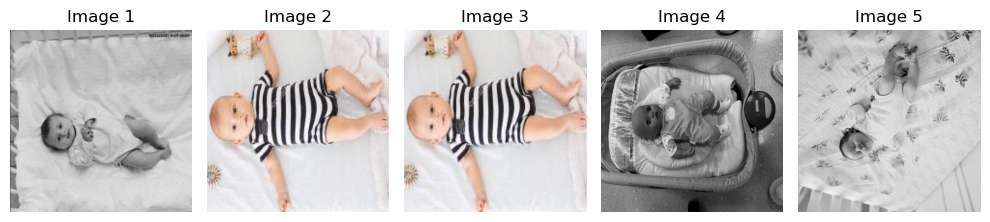

In [57]:
image_paths = emb_builder.image_paths
idx_query = 125
image_to_retrieve = f"{image_dataset_path}/{image_paths[idx_query]}"

print("Image to retrieve")
img = mpimg.imread(image_to_retrieve)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

for name, retrieval in retrieval_euclidean.items():
    print(f"{name}".ljust(100, "-"))
    distances_all, image_paths_similar_all = retrieval.retrieve_similar(idx_query=idx_query,k=5,verbose=False)
    retrieval.show_images(image_paths_similar_all)

**Classifier training with different embeddings**

In [62]:
embeddings_classifiers = {name : Classifier(emb, emb_builder.y, emb_builder.classes_bs) for name, emb in zip(embeddings_names, embeddings)}

In [63]:
clf = XGBClassifier(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1,
            reg_alpha=0.5,
            random_state=None
        )

learning_scores = { name: classifier.plot_learning_curve(clf, verbose = False) for name, classifier in embeddings_classifiers.items()}
print("Learning scores evaluated successfully!")

Learning scores evaluated successfully!


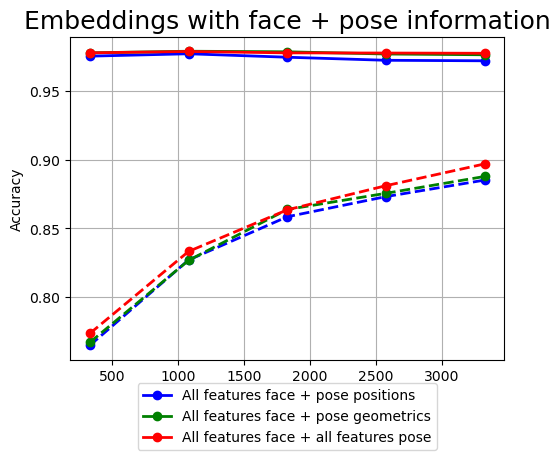

In [68]:
figsize = (embeddings_classifiers["All features face + pose positions"].figsize[0], embeddings_classifiers["All features face + pose positions"].figsize[1])
colors = ["blue", "green", "red", "brown", "yellow", "fuchsia"]


plt.figure(figsize=figsize)
for score, label, color in zip(learning_scores.values(), learning_scores.keys(), colors):
    plt.plot(score[0], score[3], marker="o", color=color, linewidth=2, label=label)
    plt.plot(score[0], score[4], marker="o", color=color, linewidth=2,linestyle="--")
    #plt.plot(score[0][len(score[0])-1], score[4][len(score[4])-1], marker="x",markersize = 10, color=color)

# Legenda
plt.legend(
    loc="lower center",          # posizione di riferimento
    bbox_to_anchor=(0.5, -0.3),    # sposta la legenda a destra del grafico
    fontsize=10
)
plt.ylabel("Accuracy")
plt.title("Embeddings with face + pose information", fontsize=18)
plt.grid(True)
plt.show()

In [69]:
save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/full_pipeline/retrieval_dataset_v3.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('jetTransient' was unexpected)

Failed validating 'additionalProperties' in display_data:

On instance['cells'][16]['outputs'][0]:
{'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAABv4AAAHvCAYAAACc3qiYAAAAOnRFWHRTb2Z0d2Fy...',
          'text/plain': '<Figure size 1800x500 with 3 Axes>'},
 'jetTransient': {'display_id': None},
 'metadata': {},
 'output_type': 'display_data'}
[NbConvertApp] Support files will be in /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/full_pipeline/reports/retrieval_dataset_v3(2025-09-20)_files/
[NbConvertApp] Writing 154063 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook'